구글 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 패키지 설치

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

### 데이터 불러오기

In [3]:
path = '/content/drive/MyDrive/AIVLE/BIGP/data/'
normal_data = pd.read_csv(path + 'press_data_normal.csv', index_col=0)
outlier_data = pd.read_csv(path + 'outlier_data.csv', index_col=0)

In [4]:
setpath = path+'set/'
X_train = np.load(setpath+'X_train.npy')
X_test = np.load(setpath+'X_test.npy')
X_valid = np.load(setpath+'X_valid.npy')
Y_train = np.load(setpath+'Y_train.npy')
Y_test = np.load(setpath+'Y_test.npy')
Y_valid = np.load(setpath+'Y_valid.npy')

In [5]:
# 검증 데이터 중 정상 데이터만 분리
X_valid_0 = X_valid[Y_valid==0]
X_valid_0.shape

(880, 20, 3)

# 모델 정의

In [6]:
def LSTM_AE(sequence, n_features):
    lstm_ae = models.Sequential()
    # Encoder
    lstm_ae.add(layers.LSTM(64, input_shape=(sequence, n_features), return_sequences=True))
    lstm_ae.add(layers.LSTM(32, return_sequences=False))
    lstm_ae.add(layers.RepeatVector(sequence))

    # Decoder
    lstm_ae.add(layers.LSTM(32, return_sequences=True))
    lstm_ae.add(layers.LSTM(64, return_sequences=True))
    lstm_ae.add(layers.TimeDistributed(layers.Dense(n_features)))

    #compile
    lstm_ae.compile(loss='mse', optimizer=optimizers.Adam(0.001))
    return lstm_ae

In [7]:
lstm_ae = LSTM_AE(20, 3)
lstm_ae.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 20, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 20, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 20, 3)          │           195 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,171 (246.76 KB)

 Trainable params: 63,171 (246.76 KB)

 Non-trainable params: 0 (0.00 B)

### 모델 학습 과정에서의 콜백 선언

In [8]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=50, verbose=1)
es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=100, verbose=1, mode='min', restore_best_weights=True)

### 학습

In [9]:
# fit
history = lstm_ae.fit(X_train, X_train,
    epochs=800, batch_size=128,
    callbacks=[reduce_lr, es], validation_data=(X_valid_0, X_valid_0))

Epoch 1/800
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0521 - val_loss: 0.0267 - learning_rate: 0.0010
Epoch 2/800
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0302 - val_loss: 0.0253 - learning_rate: 0.0010
Epoch 3/800
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0292 - val_loss: 0.0247 - learning_rate: 0.0010
Epoch 4/800
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0286 - val_loss: 0.0241 - learning_rate: 0.0010
Epoch 5/800
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0278 - val_loss: 0.0238 - learning_rate: 0.0010
Epoch 6/800
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0274 - val_loss: 0.0234 - learning_rate: 0.0010
Epoch 7/800
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0272 - val_loss: 0.0232 - learning_rate: 0.0010
Epoch 8/800
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0263 - val_loss: 0.0220 - learning_rate: 0.0010
Epoch 9/800
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0238 - val_loss: 0.0191 - learning_rate:

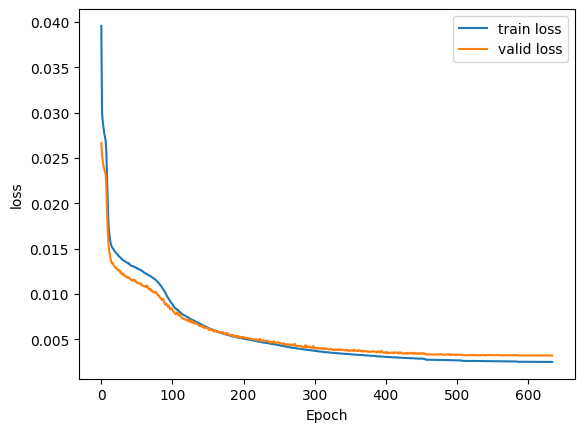

In [11]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

## 모델 저장

In [12]:
lstm_ae.save(path+'press_fault_detection.keras')